<a href="https://colab.research.google.com/github/Olalekan-Ojo/Deeplearning/blob/main/Tomato_leaf_disease_detection_using_Deep_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import os

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'

In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf

401 - Unauthorized


In [ ]:
!kaggle datasets download -d noulam/tomato

401 - Unauthorized


In [ ]:
!unzip tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
!unzip tomatoleaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)
#tf.enable_eager_execution()

import tensorflow_hub as hub
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
#from keras import optimizers



In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_set = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_set = '/content/New Plant Diseases Dataset(Augmented)/valid'
#valid_set = '/content/tomato/val'

In [ ]:
#classes for training
for i in os.listdir('/content/New Plant Diseases Dataset(Augmented)/train'):
  print(i)

Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot


In [ ]:
#classes for training
for i in os.listdir('/content/New Plant Diseases Dataset(Augmented)/valid'):
  print(i)

Tomato___Leaf_Mold
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Early_blight
Tomato___Tomato_mosaic_virus
Tomato___Target_Spot
Tomato___Bacterial_spot
Tomato___Late_blight
Tomato___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Tomato___Septoria_leaf_spot


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode='categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size
validation_set = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size = (128, 128),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(5,5),input_shape=(128,128,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.35),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 39, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
classes=training_set.class_indices
classes

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [ ]:
history=model.fit(training_set,
                  steps_per_epoch=training_set.n//training_set.batch_size,
                  epochs=30,
                  validation_data=validation_set,
                  validation_steps=validation_set.n//validation_set.batch_size)
model.save("my_model.h5")

Epoch 1/30
286/286 [==============================] - 414s 1s/step - loss: 1.3558 - accuracy: 0.5142 - val_loss: 0.7310 - val_accuracy: 0.7496
Epoch 2/30
286/286 [==============================] - 414s 1s/step - loss: 0.6873 - accuracy: 0.7588 - val_loss: 0.4733 - val_accuracy: 0.8400
Epoch 3/30
286/286 [==============================] - 412s 1s/step - loss: 0.5034 - accuracy: 0.8222 - val_loss: 0.4031 - val_accuracy: 0.8517
Epoch 4/30
286/286 [==============================] - 408s 1s/step - loss: 0.4358 - accuracy: 0.8478 - val_loss: 0.3302 - val_accuracy: 0.8862
Epoch 5/30
286/286 [==============================] - 411s 1s/step - loss: 0.3699 - accuracy: 0.8711 - val_loss: 0.2714 - val_accuracy: 0.9038
Epoch 6/30
286/286 [==============================] - 410s 1s/step - loss: 0.3217 - accuracy: 0.8868 - val_loss: 0.2780 - val_accuracy: 0.8990
Epoch 7/30
286/286 [==============================] - 408s 1s/step - loss: 0.2769 - accuracy: 0.9031 - val_loss: 0.1911 - val_accuracy: 0.9311

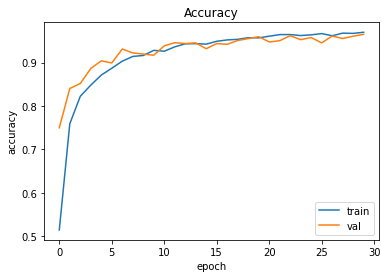

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'],loc='lower right')
plt.show()

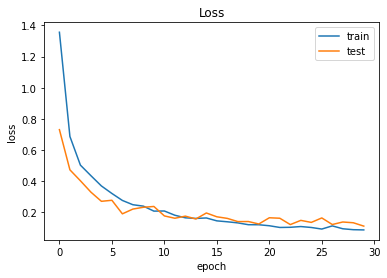

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

PLOTTING THE CONFUSION MATRIX

# New section

# New section

In [ ]:
! pip install -q scikit-plot
import scikitplot as skplt
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt



import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
y_pred = model.predict(validation_set)

[[40 49 42 44 35 35 40 44 51 45]
 [40 53 56 47 43 45 51 52 43 50]
 [48 51 43 49 41 47 45 51 36 52]
 [38 60 46 56 34 45 50 38 53 50]
 [45 52 50 38 41 35 49 45 35 46]
 [39 56 47 36 38 34 49 52 49 35]
 [48 34 43 54 56 42 46 50 35 49]
 [52 43 44 58 45 50 60 39 49 50]
 [47 37 48 44 43 38 45 58 43 45]
 [40 48 47 38 40 46 49 61 50 62]]


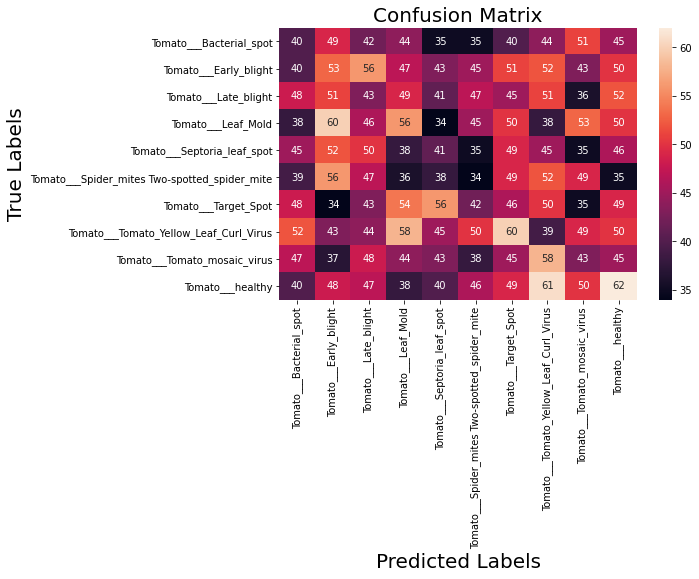

In [ ]:
#Confusion matrix
#rom sklearn.metrics import confusion_matrix
#cm = confusion_matrix(validation_set, y_pred)
#print(cm)
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(validation_set.classes, y_pred)
print(cm)

#Setting the labels
labels = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight','Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus','Tomato___healthy']

#Plot the Confusion matrix graph
fig= plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(validation_set)
print('Test accuracy :', accuracy)

72/72 [==============================] - 43s 589ms/step - loss: 0.1090 - accuracy: 0.9651
Test accuracy : 0.9651036262512207


In [ ]:
pip install tflite-support

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
     |████████████████████████████████| 200 kB 53.6 MB/s 


In [ ]:
export_dir = '/content'
tf.saved_model.save(model, export_dir )

INFO:tensorflow:Assets written to: /content/assets


In [ ]:
model.save('dom')

INFO:tensorflow:Assets written to: dom/assets


Classification report


In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, recall_score

In [ ]:
#Evaluate Model
# calculate and print  Classifiers' Accuracies
print("Decision Tree- Classifier's Accuracy:", accuracy_score(validation_set, y_pred))

ValueError: ignored

In [ ]:
#Accuracy
accuracy = accuracy_score(validation_set, y_pred)
print('Accuracy: %f' % accuracy)

In [ ]:
#Precision
precision = precision_score(test_labels, y_pred, average='macro')
print('Precision: %f' % precision)

In [ ]:
# Recall: tp / (tp + fn)
recall = recall_score(validation_set, y_pred, average='macro')
print('Recall: %f' % recall)

ValueError: ignored

In [ ]:
#F1-score
F1_score = f1_score(validation_set, y_pred, average='macro')
print('F1_score: %f' % F1_score)

NameError: ignored

In [ ]:
# Cohen Kappa
kappa = cohen_kappa_score(test_labels, y_pred)
print('Cohens kappa: %f' % kappa)

NameError: ignored

In [ ]:
#Matthews Correlation Coefficient
mcc = matthews_corrcoef(test_labels, y_pred)
print('Matthews Correlation Coefficient: %f' % mcc)

NameError: ignored

In [ ]:
#Creating the model as a tensorflow lite
from tensorflow import lite

converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()


INFO:tensorflow:Assets written to: /tmp/tmpkbof0rw8/assets


In [ ]:
#Save the model
model.save("Tomato_Disease_model.h5")

CLASSIFICATION REPORTS

In [ ]:
# calculate Classifiers' Classification Reports
print("Decision Tree-AdaBoost Classifier's CR:\n", classification_report(validation_set, y_pred))

ValueError: ignored